In [53]:
import nltk
import math
nltk.download('wordnet')
nltk.download('omw')
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yutam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\yutam\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!


In [54]:
from nltk.corpus import wordnet as wn

### Пункт 1. Достаем все синсеты на всех языках

##### Я решила взять глагол *run*, в итоговом списке в пункте 2 у него 37 синсетов.

In [55]:
run_exemplar = wn.synset('run.v.01')

In [56]:
lemmas_dict = {}
for l in wn.langs():
    lemmas_dict[l] = run_exemplar.lemma_names(l)

In [57]:
lemmas_dict

{'eng': ['run'],
 'als': ['ecje_e_shpejtë'],
 'arb': ['إجتاز_بسرعة',
  'أدار',
  'أذاب',
  'انتشر',
  'انزلق',
  'أنسل',
  'أيد_ترشيح',
  'بدأ_العدو',
  'ترشح',
  'تسرع',
  'تصفح_بسرعة',
  'تكرر',
  'جري',
  'جرى',
  'حكم',
  'خاض_معركة',
  'دخل',
  'رسم_خطا',
  'ركض',
  'سال',
  'سجل_نقطة_في_البيسبول',
  'سحب',
  'سوق_بسرعة',
  'شغل',
  'صفى',
  'صنف_الأوراق',
  'طارد',
  'طبع',
  'ظل_نافذ_المفعول',
  'عبر',
  'عجل',
  'عدا',
  'قاد',
  'قاد_السيارة',
  'نشر',
  'نما_بسرعة',
  'هرول',
  'هرْول',
  'وقع'],
 'bul': ['тичам'],
 'cat': ['córrer'],
 'cmn': ['奔跑', '跑', '跑步'],
 'dan': ['løbe'],
 'ell': ['κινούμαι', 'τρέχω'],
 'eus': ['arineketan_egin',
  'korrika_egin',
  'laster_egin',
  'lasterka_egin',
  'lasterkatu'],
 'fas': [],
 'fin': ['juosta'],
 'fra': ['courir'],
 'glg': [],
 'heb': [],
 'hrv': ['trčati'],
 'ind': ['angkat_kaki',
  'berlari',
  'buyar',
  'hidup',
  'lari',
  'memasang',
  'membelandangkan',
  'membuyarkan',
  'mengalir'],
 'ita': ['correre'],
 'jpn': ['走る',
  '駆ける

### Пункт 2. Достаем все синсеты

Достаем из нужного языка синсеты для слова, складываем эти синсеты в один список и берем только те, которые встречаются 5+ раз

In [58]:
def get_nodes(obj, amount): #amount - то, сколько раз встречается синсет. По заданию это 5, но я оставила возможность регулировать, чтобы посмотреть на варианты графика
    s = []                 
    syns = []
    for w in obj:
        for wor in obj[w]:
            s.extend(wn.synsets(wor, lang=w))
            syns.append(wn.synsets(wor, lang=w))
    finals = []
    c = Counter(s)
    for e in c:
        if int(c[e]) > amount:
            finals.append(e)  
    return syns, finals

In [59]:
synsets, finals = get_nodes(lemmas_dict, 5)

In [60]:
my_dict = {}
for a in synsets:
  #  print(a)
    for i in range(len(a)):
        for j in range(i+1, len(a)):
            if a[i] in finals and a[j] in finals:
                if (str(a[i].name()) + ' - ' + str(a[j].name())) in my_dict.keys():
                    my_dict[str(a[i].name()) + ' - ' + str(a[j].name())] += 1
                elif (str(a[j].name()) + ' - ' + str(a[i].name())) in my_dict.keys():
                    my_dict[str(a[j].name()) + ' - ' + str(a[i].name())] += 1
                else:
                    my_dict[str(a[i].name()) + ' - ' + str(a[j].name())] = 1

### Пункт 3. Строим график

Вес ребёр в основном составляем 1 или 2, поэтому разницу в ширине ребёр иногда сложно заметить. Также нормируем вес, чтобы ребра было видно

In [61]:
G = nx.Graph()
for v in finals:
    G.add_node(v.name())
for node in my_dict.keys():
    a, b = map(str, node.split(' - '))
    G.add_edge(a, b, weight = int(my_dict[node]))

In [62]:
def buildGraph(G):
    pos=nx.spring_layout(G, k = 0.1, iterations=100)
    plt.figure(figsize=(20, 11))
    nx.draw_networkx_nodes(G, pos, node_color='red', node_size=10) 
    weights = []
    for (u, v, d) in G.edges(data=True):
        wei = int(d['weight'])
        weights.append(wei)
    for w in weights:
        el = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == w]
        nx.draw_networkx_edges(G, pos, edgelist=el, edge_color='lightblue', width=w/5)
    nx.draw_networkx_labels(G, pos, font_size=20)
    plt.axis('off') 
    plt.show()

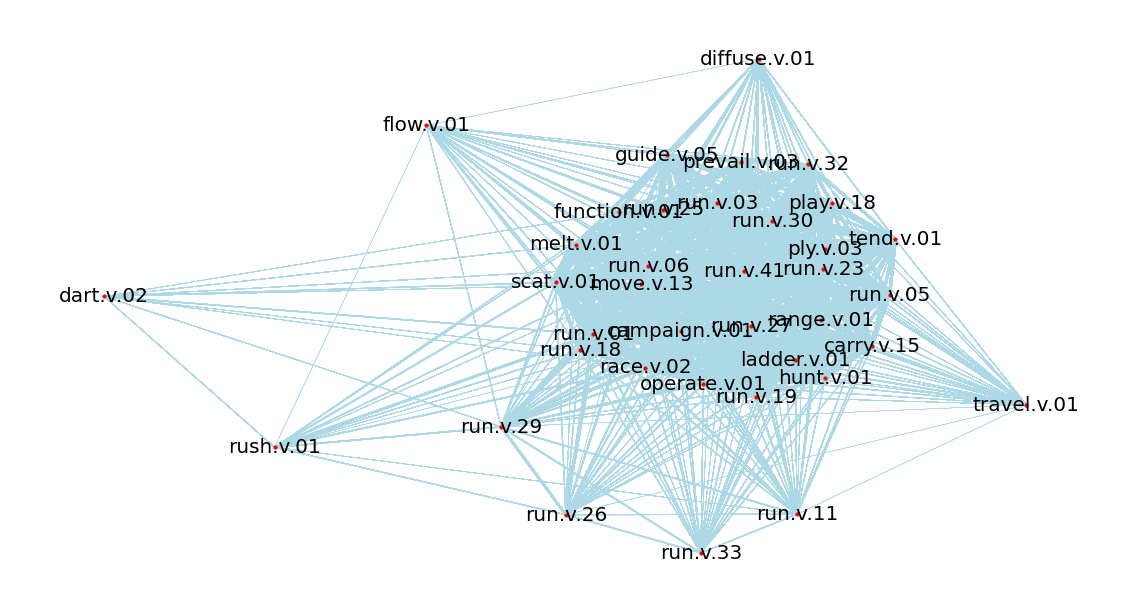

In [63]:
buildGraph(G)

### Пункт 4. Анализ графа

- в нашем графе очень большое количество ребер, что логично, потому что мы выбирали узлы с высокой степенью узла; 
- соотвественно, полность тоже будет высокой (в следующем куске кода посчитаем плотность графа);

Эти два пункта говорят о том, что данные значения глагола падать часто связаны между собой и сочетаются в одном и том же слове в разных языках.

In [64]:
def get_plot(nodes, my_dict):
    new_fin = []
    for a in nodes:
        new_fin.append(a)
    c = 0
    d = 0
    for i in range(len(new_fin)):
        for j in range(i+1, len(new_fin)):
            c += 1
            if str(new_fin[i] + ' - ' + new_fin[j]) in my_dict.keys() or str(new_fin[j] + ' - ' + new_fin[i]) in my_dict.keys():
                d += 1
    return f'Плотность графа: {round(d/c*100, 2)}%'

In [65]:
f = [i.name() for i in finals]
get_plot(f, my_dict)

'Плотность графа: 91.44%'

In [66]:
G.degree(weight='weight')

DegreeView({'run.v.01': 610, 'scat.v.01': 511, 'run.v.03': 376, 'operate.v.01': 388, 'run.v.05': 378, 'run.v.06': 504, 'function.v.01': 381, 'range.v.01': 378, 'campaign.v.01': 394, 'play.v.18': 359, 'run.v.11': 122, 'tend.v.01': 378, 'prevail.v.03': 336, 'run.v.18': 342, 'run.v.19': 359, 'carry.v.15': 359, 'guide.v.05': 321, 'run.v.23': 378, 'run.v.25': 359, 'run.v.26': 121, 'run.v.27': 383, 'run.v.29': 182, 'run.v.30': 359, 'run.v.32': 330, 'run.v.33': 100, 'ply.v.03': 381, 'hunt.v.01': 359, 'race.v.02': 443, 'move.v.13': 396, 'melt.v.01': 473, 'ladder.v.01': 378, 'run.v.41': 378, 'diffuse.v.01': 123, 'flow.v.01': 82, 'dart.v.02': 31, 'rush.v.01': 62, 'travel.v.01': 82})

In [67]:
nx.degree_centrality(G)

{'run.v.01': 1.0,
 'scat.v.01': 1.0,
 'run.v.03': 0.9444444444444444,
 'operate.v.01': 0.9444444444444444,
 'run.v.05': 0.9444444444444444,
 'run.v.06': 1.0,
 'function.v.01': 1.0,
 'range.v.01': 0.9444444444444444,
 'campaign.v.01': 0.9722222222222222,
 'play.v.18': 0.9444444444444444,
 'run.v.11': 0.9166666666666666,
 'tend.v.01': 0.9444444444444444,
 'prevail.v.03': 0.9444444444444444,
 'run.v.18': 1.0,
 'run.v.19': 0.9444444444444444,
 'carry.v.15': 0.9444444444444444,
 'guide.v.05': 0.9444444444444444,
 'run.v.23': 0.9444444444444444,
 'run.v.25': 0.9444444444444444,
 'run.v.26': 0.9166666666666666,
 'run.v.27': 0.9722222222222222,
 'run.v.29': 0.9722222222222222,
 'run.v.30': 0.9444444444444444,
 'run.v.32': 0.9444444444444444,
 'run.v.33': 0.861111111111111,
 'ply.v.03': 0.9444444444444444,
 'hunt.v.01': 0.9444444444444444,
 'race.v.02': 1.0,
 'move.v.13': 1.0,
 'melt.v.01': 1.0,
 'ladder.v.01': 0.9444444444444444,
 'run.v.41': 0.9444444444444444,
 'diffuse.v.01': 0.805555555555

### Пункт 4.2

- Самая высокая степень у узла run.v.01, что было ожидаемо, учитывая, что это наш изначальный синсет (соотсвтенно, он есть в каждом наборе синсетов каждой леммы). На втором месте идёт глагол 'scat', что-то вроде "уносить ноги". По значению осень близок к run, просто добавляется оттенок высокой скорости (и, возможно, испуга?) На третьем мест run.v.06 - (move along, of liquids), такое же употребление слова бежать можно встретить в русском (река бежит).

- наивысшая степеноь центральности (1) у тех же синсетов, которые обсуждаются в предыдущем пунтке + еще у нескольких (например, race.v.02, move.v.13, melt.v.01, run.v.18). 

- примерно то же мы видим в betweenness centrlity

По сути это говорит о том, что во многих языках, эти значения выражаются одним и тем же словом


In [68]:
nx.betweenness_centrality(G, normalized=False)

{'run.v.01': 4.72292190259376,
 'scat.v.01': 4.72292190259376,
 'run.v.03': 0.34523014990200757,
 'operate.v.01': 0.34523014990200757,
 'run.v.05': 0.34523014990200757,
 'run.v.06': 4.72292190259376,
 'function.v.01': 4.72292190259376,
 'range.v.01': 0.34523014990200757,
 'campaign.v.01': 1.8756996803715376,
 'play.v.18': 0.34523014990200757,
 'run.v.11': 1.4718185040765681,
 'tend.v.01': 0.34523014990200757,
 'prevail.v.03': 0.34523014990200757,
 'run.v.18': 4.72292190259376,
 'run.v.19': 0.34523014990200757,
 'carry.v.15': 0.34523014990200757,
 'guide.v.05': 0.34523014990200757,
 'run.v.23': 0.34523014990200757,
 'run.v.25': 0.34523014990200757,
 'run.v.26': 1.4718185040765681,
 'run.v.27': 1.8756996803715376,
 'run.v.29': 4.3296729102068365,
 'run.v.30': 0.34523014990200757,
 'run.v.32': 0.34523014990200757,
 'run.v.33': 0.0,
 'ply.v.03': 0.34523014990200757,
 'hunt.v.01': 0.34523014990200757,
 'race.v.02': 4.72292190259376,
 'move.v.13': 4.72292190259376,
 'melt.v.01': 4.7229219025

### Пункт 4.3 

Смотрим на сообщества
- если смотреть на girvan_newman, то получается, что все синсеты - это одно большое сообщество, от которого с каждым уровнем отделяется по одному элементу
- при разделении по greedy_modularity_communities у нас появлются две группы, все еще разного размера, но уже не n-1 и 1. Интересно, что во вторую (меньшую по размеру) группу вошли все значения с наибольшим кол-ством связей.


In [69]:
from networkx.algorithms import community

In [70]:
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
one_more_level_communities = next(communities_generator)
print("top level communities:", sorted(map(sorted, top_level_communities)))
print("next level communities:", sorted(map(sorted, next_level_communities)))
print("one more level communities:", sorted(map(sorted, one_more_level_communities)))

top level communities: [['campaign.v.01', 'carry.v.15', 'diffuse.v.01', 'flow.v.01', 'function.v.01', 'guide.v.05', 'hunt.v.01', 'ladder.v.01', 'melt.v.01', 'move.v.13', 'operate.v.01', 'play.v.18', 'ply.v.03', 'prevail.v.03', 'race.v.02', 'range.v.01', 'run.v.01', 'run.v.03', 'run.v.05', 'run.v.06', 'run.v.11', 'run.v.18', 'run.v.19', 'run.v.23', 'run.v.25', 'run.v.26', 'run.v.27', 'run.v.29', 'run.v.30', 'run.v.32', 'run.v.33', 'run.v.41', 'rush.v.01', 'scat.v.01', 'tend.v.01', 'travel.v.01'], ['dart.v.02']]
next level communities: [['campaign.v.01', 'carry.v.15', 'diffuse.v.01', 'flow.v.01', 'function.v.01', 'guide.v.05', 'hunt.v.01', 'ladder.v.01', 'melt.v.01', 'move.v.13', 'operate.v.01', 'play.v.18', 'ply.v.03', 'prevail.v.03', 'race.v.02', 'range.v.01', 'run.v.01', 'run.v.03', 'run.v.05', 'run.v.06', 'run.v.11', 'run.v.18', 'run.v.19', 'run.v.23', 'run.v.25', 'run.v.26', 'run.v.27', 'run.v.29', 'run.v.30', 'run.v.32', 'run.v.33', 'run.v.41', 'scat.v.01', 'tend.v.01', 'travel.v.0

In [71]:
c = list(community.greedy_modularity_communities(G))
sorted(c)

[frozenset({'campaign.v.01',
            'carry.v.15',
            'diffuse.v.01',
            'guide.v.05',
            'hunt.v.01',
            'ladder.v.01',
            'operate.v.01',
            'play.v.18',
            'ply.v.03',
            'prevail.v.03',
            'range.v.01',
            'run.v.03',
            'run.v.05',
            'run.v.11',
            'run.v.19',
            'run.v.23',
            'run.v.25',
            'run.v.26',
            'run.v.27',
            'run.v.30',
            'run.v.32',
            'run.v.33',
            'run.v.41',
            'tend.v.01',
            'travel.v.01'}),
 frozenset({'dart.v.02',
            'flow.v.01',
            'function.v.01',
            'melt.v.01',
            'move.v.13',
            'race.v.02',
            'run.v.01',
            'run.v.06',
            'run.v.18',
            'run.v.29',
            'rush.v.01',
            'scat.v.01'})]

### Пункт 5. 

Строим тот же график, но при весе ребра от 13 (в задании 10, но график при 10 остается таким же запутанным... Но можно очень легко поменять на 10)

In [72]:
def mini_graph(edges):
    my_new_dict = {}
    new_finals = []

    for key in my_dict.keys():
        if int(my_dict[key]) > edges:
            my_new_dict[key] = my_dict[key]
            syns = key.split(' - ')
            if syns[0] not in new_finals:
                new_finals.append(syns[0])
            if syns[1] not in new_finals:
                new_finals.append(syns[1])  
    G1 = nx.Graph()
    for v in new_finals:
        G1.add_node(v)
    for node in my_new_dict.keys():
        a, b = map(str, node.split(' - '))
        G1.add_edge(a, b, weight = int(my_new_dict[node]))
    return new_finals, my_new_dict, G1

In [73]:
fin, di, G1 = mini_graph(13)

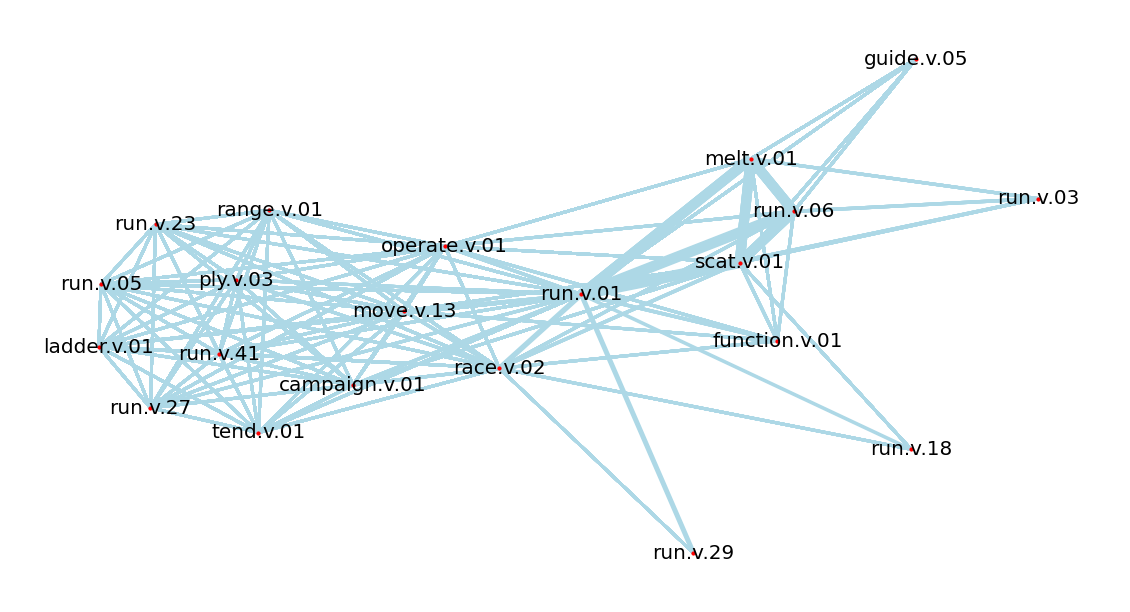

In [74]:
buildGraph(G1)

### Пункт 5.2

Смотрим на метрики для второго графа.

- У нас уменьшилась плотность (что ожидаемо, учитывая наши действия).
- узлами с наибольшей степенью оказываются те же узлы, что и до этого
- самым центральным узлом все еще остается run.v.01

In [75]:
get_plot(fin, di)

'Плотность графа: 52.86%'

In [76]:
G1.degree(weight='weight')

DegreeView({'run.v.01': 441, 'scat.v.01': 275, 'run.v.03': 66, 'operate.v.01': 228, 'run.v.05': 168, 'run.v.06': 230, 'function.v.01': 107, 'range.v.01': 168, 'campaign.v.01': 186, 'tend.v.01': 168, 'run.v.18': 47, 'guide.v.05': 56, 'run.v.23': 168, 'run.v.27': 170, 'run.v.29': 39, 'ply.v.03': 170, 'race.v.02': 263, 'move.v.13': 202, 'melt.v.01': 208, 'ladder.v.01': 168, 'run.v.41': 168})

In [77]:
nx.degree_centrality(G1)

{'run.v.01': 1.0,
 'scat.v.01': 0.55,
 'run.v.03': 0.2,
 'operate.v.01': 0.8,
 'run.v.05': 0.6000000000000001,
 'run.v.06': 0.4,
 'function.v.01': 0.35000000000000003,
 'range.v.01': 0.6000000000000001,
 'campaign.v.01': 0.65,
 'tend.v.01': 0.6000000000000001,
 'run.v.18': 0.15000000000000002,
 'guide.v.05': 0.2,
 'run.v.23': 0.6000000000000001,
 'run.v.27': 0.6000000000000001,
 'run.v.29': 0.1,
 'ply.v.03': 0.6000000000000001,
 'race.v.02': 0.8500000000000001,
 'move.v.13': 0.7000000000000001,
 'melt.v.01': 0.35000000000000003,
 'ladder.v.01': 0.6000000000000001,
 'run.v.41': 0.6000000000000001}

In [78]:
nx.betweenness_centrality(G1, normalized=False)

{'run.v.01': 49.283333333333324,
 'scat.v.01': 8.516666666666666,
 'run.v.03': 0.0,
 'operate.v.01': 11.699999999999996,
 'run.v.05': 0.0,
 'run.v.06': 2.1166666666666667,
 'function.v.01': 0.65,
 'range.v.01': 0.0,
 'campaign.v.01': 1.6000000000000003,
 'tend.v.01': 0.0,
 'run.v.18': 0.0,
 'guide.v.05': 0.0,
 'run.v.23': 0.0,
 'run.v.27': 0.0,
 'run.v.29': 0.0,
 'ply.v.03': 0.0,
 'race.v.02': 20.08333333333333,
 'move.v.13': 3.8000000000000007,
 'melt.v.01': 1.25,
 'ladder.v.01': 0.0,
 'run.v.41': 0.0}

In [79]:
communities_generator1 = community.girvan_newman(G1)
top_level_communities1 = next(communities_generator)
next_level_communities1 = next(communities_generator)
one_more_level_communities1 = next(communities_generator)
print("top level communities:", sorted(map(sorted, top_level_communities1)))
print("next level communities:", sorted(map(sorted, next_level_communities1)))
print("one more level communities:", sorted(map(sorted, one_more_level_communities1)))

top level communities: [['campaign.v.01', 'carry.v.15', 'function.v.01', 'guide.v.05', 'hunt.v.01', 'ladder.v.01', 'melt.v.01', 'move.v.13', 'operate.v.01', 'play.v.18', 'ply.v.03', 'prevail.v.03', 'race.v.02', 'range.v.01', 'run.v.01', 'run.v.03', 'run.v.05', 'run.v.06', 'run.v.11', 'run.v.18', 'run.v.19', 'run.v.23', 'run.v.25', 'run.v.26', 'run.v.27', 'run.v.29', 'run.v.30', 'run.v.32', 'run.v.33', 'run.v.41', 'scat.v.01', 'tend.v.01', 'travel.v.01'], ['dart.v.02'], ['diffuse.v.01'], ['flow.v.01'], ['rush.v.01']]
next level communities: [['campaign.v.01', 'carry.v.15', 'function.v.01', 'guide.v.05', 'hunt.v.01', 'ladder.v.01', 'melt.v.01', 'move.v.13', 'operate.v.01', 'play.v.18', 'ply.v.03', 'prevail.v.03', 'race.v.02', 'range.v.01', 'run.v.01', 'run.v.03', 'run.v.05', 'run.v.06', 'run.v.11', 'run.v.18', 'run.v.19', 'run.v.23', 'run.v.25', 'run.v.26', 'run.v.27', 'run.v.29', 'run.v.30', 'run.v.32', 'run.v.41', 'scat.v.01', 'tend.v.01', 'travel.v.01'], ['dart.v.02'], ['diffuse.v.01'

In [80]:
c = list(community.greedy_modularity_communities(G))
sorted(c)

[frozenset({'campaign.v.01',
            'carry.v.15',
            'diffuse.v.01',
            'guide.v.05',
            'hunt.v.01',
            'ladder.v.01',
            'operate.v.01',
            'play.v.18',
            'ply.v.03',
            'prevail.v.03',
            'range.v.01',
            'run.v.03',
            'run.v.05',
            'run.v.11',
            'run.v.19',
            'run.v.23',
            'run.v.25',
            'run.v.26',
            'run.v.27',
            'run.v.30',
            'run.v.32',
            'run.v.33',
            'run.v.41',
            'tend.v.01',
            'travel.v.01'}),
 frozenset({'dart.v.02',
            'flow.v.01',
            'function.v.01',
            'melt.v.01',
            'move.v.13',
            'race.v.02',
            'run.v.01',
            'run.v.06',
            'run.v.18',
            'run.v.29',
            'rush.v.01',
            'scat.v.01'})]

### Пункт 6

В целом, мы можем сказать, что центральным синсетом из значений run является run.v.01, но это может быть и влиянием того, что run.v.01 - это наш изначальный синсет. 

Можно говорить о том, что слова в языках часто сочетают значения "бежать", "нестись", "гнаться" и так далее. А еще run часто используется в значении работать, функционировать (operate). 

![img from clics](clics_run.png "RUN")

### Пункт 7. Бонусное

    Кажется, что мой граф не очень похож на тот, который представлен в CLICS. Наверное, это может быть связано с тем, как синсеты называются - например, у меня нет flee, но есть scat. Зато и у меня, и в CLICS есть flow, тесно связанный с run. 
    Еще одним обоснованием может быть то, что в CLICS выборка языков сильно больше, чем в wordnet'е. 